# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*


## Библиотека pandas. Упражнения.

In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import numpy as np
import pandasql
import matplotlib.pyplot as plt

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [4]:
data = pd.read_csv('https://moredata.pythonhelp.ru/diabetes/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


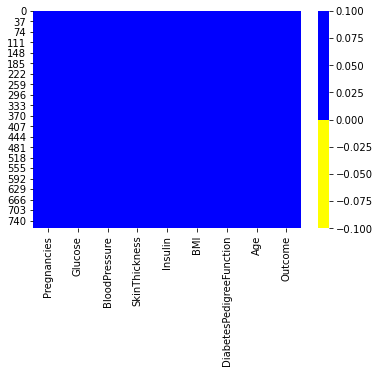

In [7]:
cols = data.columns
colors = ['yellow', 'blue']
a = sns.heatmap(data[cols].isnull(),
                   cmap = sns.color_palette(colors))
for i, col in enumerate(data.columns):
    pct_missing = np.mean(data[col].isnull())
    print (pct_missing)#(f'{col} - {round(pct_missing*100)}%')

__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [12]:
data[(data.Age >50)
    &(data.Outcome ==1)]['Age'].count()

38

__Задание 5.__

Найдите трех женщин с наибольшими числом беременностей.

In [15]:
query = """
     SELECT *
     FROM data
     ORDER BY Pregnancies desc
     """
pandasql.sqldf(query, locals()).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,17,163,72,41,114,40.9,0.817,47,1
1,15,136,70,32,110,37.1,0.153,43,1
2,14,100,78,25,184,36.6,0.412,46,1


__Задание 6.__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [17]:
data[(data.Age <30)
    & (data.Pregnancies >=3)]['Age'].count()


117

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [19]:
new_data = data[(data.BloodPressure <= 89)
    &(data.BloodPressure >= 80)]
new_data.BloodPressure.count()*100/data.BloodPressure.count()


18.880208333333332

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [20]:
query = """
    SELECT *
    FROM data
    WHERE BMI >=30 AND BloodPressure > 89
    """
d = pandasql.sqldf(query, locals())
d['BMI'].count()

44

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [21]:
data.groupby('Outcome')[['Glucose']].mean()

,Glucose
Outcome,
0,109.980000
1,141.257463


In [22]:
data.groupby('Outcome')[['BloodPressure']].mean()

,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [23]:
data.groupby('Outcome')[['Insulin']].mean()

,Insulin
Outcome,
0,68.792000
1,100.335821


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

(0.0, 17.0)

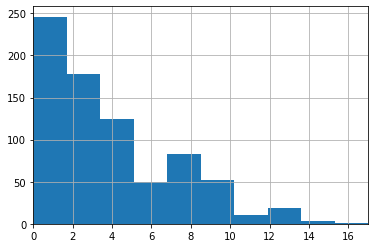

In [26]:
data.Pregnancies.hist(bins = 10)
plt.locator_params(integer=True)
plt.xlim(0,17)


<AxesSubplot:>

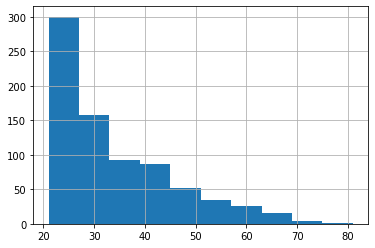

In [27]:
data.Age.hist()

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

<AxesSubplot:ylabel='None'>

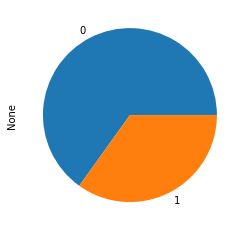

In [28]:
data.groupby('Outcome').size().plot(kind = 'pie')

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

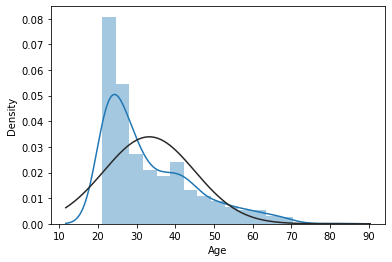

In [30]:
import seaborn
import scipy.stats
seaborn.distplot((data.Age), fit=scipy.stats.norm)



C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

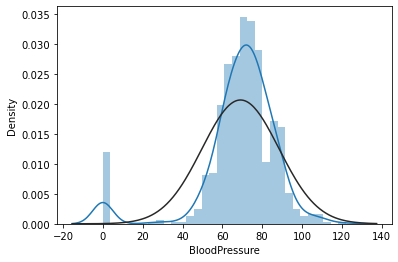

In [31]:
seaborn.distplot((data.BloodPressure),fit=scipy.stats.norm)

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

<AxesSubplot:>

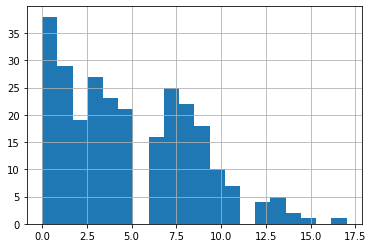

In [5]:
data[data.Outcome == 1].Pregnancies.hist(bins=20)

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [33]:
data['wasPregnant'] = data['Pregnancies'].apply(lambda x: 1 if x != 0 else 0)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,wasPregnant
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0


__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [34]:
query = """
   SELECT  wasPregnant, count(Outcome) as count
   FROM data
   WHERE wasPregnant = 1
   """
df1 = pandasql.sqldf(query, locals())
query = """
   SELECT  wasPregnant, count(Outcome) as count
   FROM data
   WHERE wasPregnant = 0
   """
df2 = pandasql.sqldf(query, locals())
d1 = df1['count']*100/data['Outcome'].count()
d2 = df2['count']*100/data['Outcome'].count()
print(f'Женщины, которые были беременны, болели диабетом чаще, чем те, что ни разу не были беременны.{d1[0].round(2)}% - женщины, заболевшие диабетом, которые были беременны, {d2[0].round(2)}% - женщины, заболевшии диабетом, которые не были беременны.') 

Женщины, которые были беременны, болели диабетом чаще, чем те, что ни разу не были беременны.85.55% - женщины, заболевшие диабетом, которые были беременны, 14.45% - женщины, заболевшии диабетом, которые не были беременны.


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [38]:
def BMI_new(x):
    if x > 0 and x < 18.5:
        return 'Underweight'
    elif x > 18.5 and x < 24.9:
        return 'Normal weight'
    elif x >=25 and x <=29.9:
        return 'Overweight'
    elif x == 0:
        return 0
    else:
        return 'Obesity'
d = []
for i in data['BMI']:
    d.append(BMI_new(i))
data['bodyType'] = d
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,wasPregnant,bodyType
0,6,148,72,35,0,33.6,0.627,50,1,1,Obesity
1,1,85,66,29,0,26.6,0.351,31,0,1,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,1,Normal weight
3,1,89,66,23,94,28.1,0.167,21,0,1,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,0,Obesity


__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [37]:
query = """
   SELECT  count(*) as count
   FROM data
   WHERE BloodPressure BETWEEN 80 AND 89 AND  BMI < 30 AND Outcome = 1
   """
helth = pandasql.sqldf(query, locals())
helth_d = helth['count']*100/data['Age'].count()
print(f'{helth_d[0].round(2)}% женщин с нормальным весом и давлением больны диабетом.')

1.04% женщин с нормальным весом и давлением больны диабетом.
